In [38]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [93]:
data = load_wine()
data_array = data.data
target = data.target
data_array_small = data_array[:13]

In [94]:
values,vectors = LA.eig(data_array_small)
values_matrix = np.diag(values)
recon = vectors.dot(values_matrix).dot(LA.inv(vectors))
print(np.around(recon - data_array_small,2).sum() == 0)

True


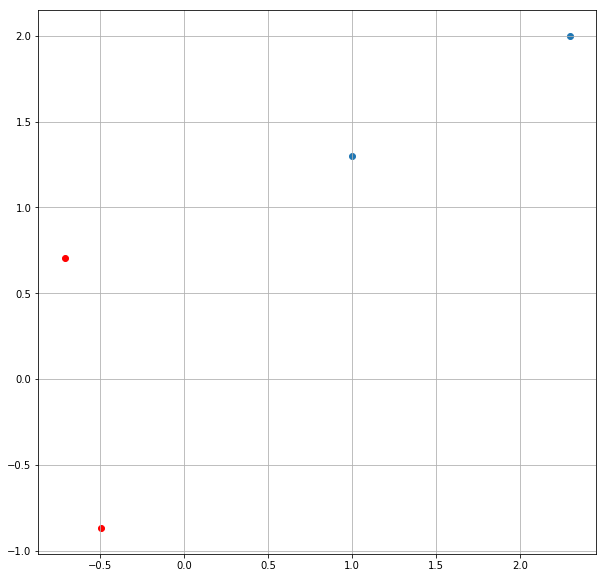

In [95]:
data_point_1 = np.array([1,1.3])
data_point_2 = np.array([2.3,2])
fake_data = np.vstack((data_point_1,data_point_2))
values,vectors = LA.eig(fake_data)
plt.figure(figsize=(10, 10))
plt.scatter(fake_data[:,0],fake_data[:,1])
vectors_show = vectors.T
plt.scatter(vectors_show[:,0],vectors_show[:,1],c='red')
plt.grid()
plt.show()

In [88]:
print(values)
print(vectors)

[-0.3  3.3]
[[-0.70710678 -0.49205726]
 [ 0.70710678 -0.87056284]]


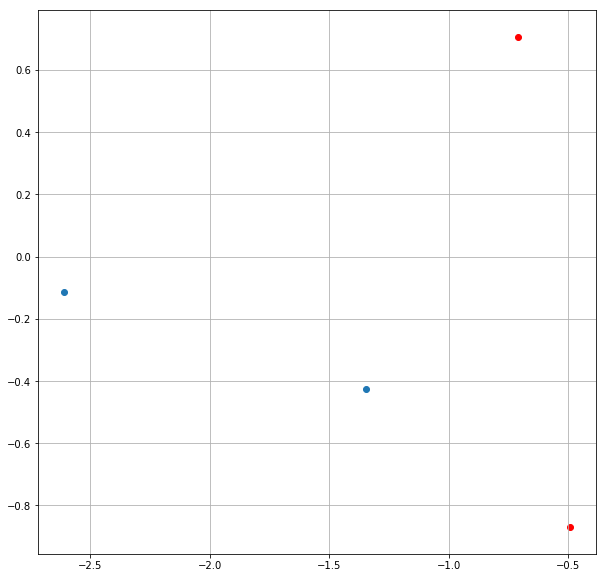

In [98]:
new_base_1 = vectors[:,0]
new_base_2 = vectors[:,1]
bassis_change_mat = vectors.T
changed_bases = []
for xx in fake_data:
    changed_result = xx.dot(bassis_change_mat)
    changed_bases.append(changed_result)
changed_bases = np.asarray(changed_bases)
plt.figure(figsize=(10, 10))
plt.grid()
vectors_show = vectors.T
plt.scatter(vectors_show[:,0],vectors_show[:,1],c='red')
plt.scatter(changed_bases[:,0],changed_bases[:,1])
plt.show()

In [107]:
import pandas as pd
import seaborn as sns
data = load_wine()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


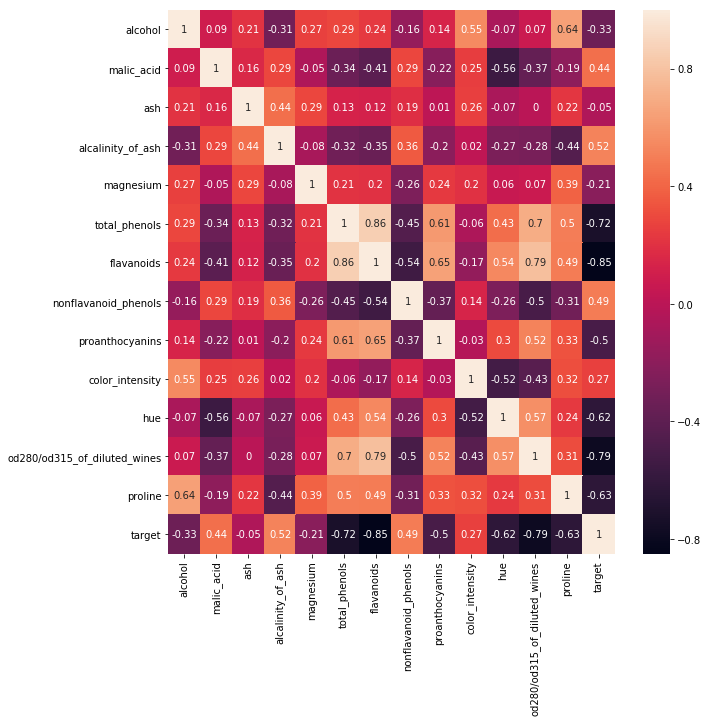

In [110]:
plt.figure(figsize=(10, 10))
sns.heatmap(np.around(df.corr(),2),annot=True)
plt.show()

In [111]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

    flavanoids  od280/od315_of_diluted_wines
0         3.06                          3.92
1         2.76                          3.40
2         3.24                          3.17
3         3.49                          3.45
4         2.69                          2.93
5         3.39                          2.85
6         2.52                          3.58
7         2.51                          3.58
8         2.98                          2.85
9         3.15                          3.55
10        3.32                          3.17
11        2.43                          2.82
12        2.76                          2.90
13        3.69                          2.73
14        3.64                          3.00
15        2.91                          2.88
16        3.14                          2.65
17        3.40                          2.57
18        3.93                          2.82
19        3.03                          3.36
(178, 2)
(178,)


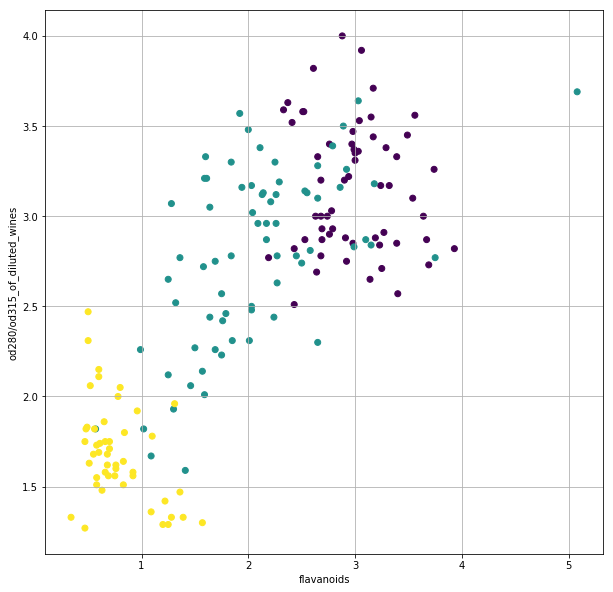

In [139]:
data_three = df[['flavanoids','od280/od315_of_diluted_wines']]
print(data_three.head(20))
data_main = data_three.values
data_color = df.target.values
print(data_main.shape)
print(data_color.shape)
plt.figure(figsize=(10, 10))
plt.scatter(data_main[:,0],data_main[:,1],c=data_color)
plt.xlabel('flavanoids')
plt.ylabel('od280/od315_of_diluted_wines')
plt.grid()
plt.show()

In [152]:
data_mean = data_main.mean(axis=0)
data_std = np.sqrt(((data_main-data_mean)**2).sum()/(len(data_main)-1))
data_var = data_std ** 2
print("Mean : ", data_mean)
print("STD : ",data_std)
print("Var : ", data_var)

Mean :  [2.02926966 2.61168539]
STD :  1.2254815712901455
Var :  1.5018050815717638


(178, 2)
[[3.06 3.92]
 [2.76 3.4 ]
 [3.24 3.17]]
(178, 2)
[[1.03073034 1.30831461]
 [0.73073034 0.78831461]
 [1.21073034 0.55831461]]


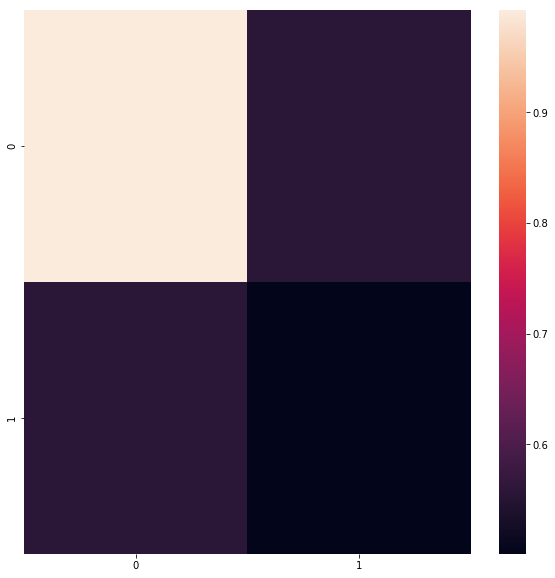

[[0.99211351 0.55512595]
 [0.55512595 0.50125446]]


In [169]:
print(data_main.shape)
print(data_main[:3])
center_matrix  = data_main - data_mean
print(center_matrix.shape)
print(center_matrix[:3])
covarience = (1/ len(center_matrix)) * center_matrix.T.dot(center_matrix) 
plt.figure(figsize=(10,10))
sns.heatmap(covarience)
plt.show()
print(covarience)

          0         1
0  0.997719  0.558262
1  0.558262  0.504086


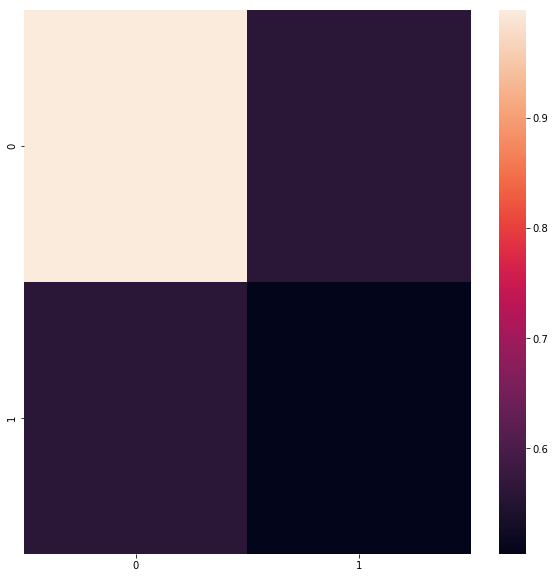

In [170]:
# compare with built in 
data_main_df = pd.DataFrame(data_main)
print(data_main_df.cov())
plt.figure(figsize=(10,10))
sns.heatmap(data_main_df.cov())
plt.show()

In [174]:
e_valaue,e_vector = np.linalg.eig(covarience)
print("Value: ",e_valaue)
print("Vector : ",e_vector.flatten())

Value:  [1.35364401 0.13972396]
Vector :  [ 0.8379614 -0.5457295  0.5457295  0.8379614]
